https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

위의 데이터셋을 불러와서 분류하는 모델을 만들어봅시다.


ImageFolder함수 대신 Dataset을 subclassing하여 custom dataset을 만들어 사용해 봅시다

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

__init__, __len__, __getitem__ 을 재정의해줍니다.

```
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class Brain(Dataset):
    def __init__(self):
        pass

    def __len__(self):
        pass

    def __getitem__(self, index):
        pass
```

In [1]:
import os
from PIL import Image

우선 이미지를 불러와봅시다

In [4]:
# 폴더 경로 지정
path = '/content/drive/MyDrive/Teaching/PD 2401/brain_tumor_dataset'

In [5]:
files = os.listdir(path+'/yes')  # 폴더에 있는 파일 불러오기

In [6]:
files

['Y66.JPG',
 'Y188.jpg',
 'Y193.JPG',
 'Y45.JPG',
 'Y73.jpg',
 'Y115.JPG',
 'Y26.jpg',
 'Y96.jpg',
 'Y58.JPG',
 'Y153.jpg',
 'Y248.JPG',
 'Y168.jpg',
 'Y164.JPG',
 'Y159.JPG',
 'Y79.jpg',
 'Y250.jpg',
 'Y95.jpg',
 'Y103.jpg',
 'Y39.jpg',
 'Y158.JPG',
 'Y166.JPG',
 'Y106.jpg',
 'Y184.JPG',
 'Y156.JPG',
 'Y253.JPG',
 'Y160.JPG',
 'Y2.jpg',
 'Y21.jpg',
 'Y16.JPG',
 'Y59.JPG',
 'Y30.jpg',
 'Y54.jpg',
 'Y116.JPG',
 'Y246.JPG',
 'Y114.JPG',
 'Y97.JPG',
 'Y41.jpg',
 'Y249.JPG',
 'Y85.JPG',
 'Y180.jpg',
 'Y245.jpg',
 'Y92.jpg',
 'Y185.jpg',
 'Y76.jpg',
 'Y67.JPG',
 'Y77.jpg',
 'Y50.JPG',
 'Y167.JPG',
 'Y148.JPG',
 'Y11.jpg',
 'Y163.JPG',
 'Y62.jpg',
 'Y108.jpg',
 'Y3.jpg',
 'Y91.jpg',
 'Y27.jpg',
 'Y17.jpg',
 'Y38.jpg',
 'Y169.jpg',
 'Y86.JPG',
 'Y42.jpg',
 'Y255.JPG',
 'Y187.jpg',
 'Y52.jpg',
 'Y243.JPG',
 'Y46.jpg',
 'Y101.jpg',
 'Y161.JPG',
 'Y111.JPG',
 'Y1.jpg',
 'Y254.jpg',
 'Y165.JPG',
 'Y162.jpg',
 'Y31.jpg',
 'Y105.jpg',
 'Y89.JPG',
 'Y55.jpg',
 'Y102.jpg',
 'Y147.JPG',
 'Y28.jpg',
 '

In [7]:
imgs = []

for file in files:  # 파일명 순회
  file_path = os.path.join(path+'/yes', file) # 경로 + 파일명
  img = Image.open(file_path) # 이미지 열기
  imgs.append(img) # 리스트에 추가

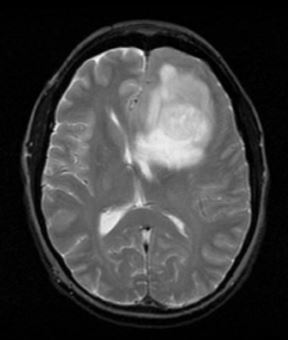

In [8]:
imgs[0]

In [9]:
imgs[0].size

(288, 340)

numpy로 변환해보고, 배열 사이즈 확인을 해봅시다

In [10]:
import numpy as np
img = np.array(imgs[0])

In [11]:
img.shape

(340, 288, 3)

파이토치 학습에 맞도로 컬러채널 위치를 변경해줍니다

In [12]:
img = img.transpose(2,0,1)

In [13]:
img.shape

(3, 340, 288)

이제 클래스로 만들어봅시다.

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import numpy as np

class Brain(Dataset):
    def __init__(self, path = None):
        if path is None: path = '/content/drive/MyDrive/Teaching/DL 202301/brain_tumar'

        imgs = []

        # yes 폴더에 있는 파일 불러오기
        files = os.listdir(path+'/yes')
        for file in files:  # 파일명 순회
          try:
            file_path = os.path.join(path+'/yes', file) # 경로 + 파일명
            img = Image.open(file_path).convert('RGB') # RGB로 이미지 열기
            img_np = np.array(img).transpose(2,0,1)
            imgs.append((img_np, 1)) # 리스트에 추가   # yes = 1로 지정
          except:
            print(img.size, file)

        files = os.listdir(path+'/no')
        for file in files:  # 파일명 순회
          file_path = os.path.join(path+'/no', file) # 경로 + 파일명
          img = Image.open(file_path).convert('RGB') # 이미지 열기
          img_np = np.array(img).transpose(2,0,1)
          imgs.append((img_np, 0)) # 리스트에 추가   # no = 0으로 지정

        # 내부 변수에 저장
        self.data = imgs

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [15]:
brain = Brain()

In [16]:
brain[0][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [17]:
brain[0][1]

1

In [25]:
type(brain[0])

tuple

DataLoader를 통해서 이미지를 불러와봅시다


In [18]:
from torch.utils.data import DataLoader

dataloader = DataLoader(brain)

In [21]:
type(dataloader)

torch.utils.data.dataloader.DataLoader

In [22]:
dir(dataloader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [27]:
for img, label in dataloader:
  print(img.shape, label)



torch.Size([1, 3, 256, 256]) tensor([1])
torch.Size([1, 3, 245, 224]) tensor([1])
torch.Size([1, 3, 380, 294]) tensor([1])
torch.Size([1, 3, 325, 254]) tensor([1])
torch.Size([1, 3, 512, 512]) tensor([1])
torch.Size([1, 3, 366, 310]) tensor([1])
torch.Size([1, 3, 342, 273]) tensor([1])
torch.Size([1, 3, 336, 264]) tensor([1])
torch.Size([1, 3, 1024, 1024]) tensor([1])
torch.Size([1, 3, 360, 319]) tensor([1])
torch.Size([1, 3, 325, 254]) tensor([1])
torch.Size([1, 3, 316, 270]) tensor([1])
torch.Size([1, 3, 1200, 1059]) tensor([1])
torch.Size([1, 3, 360, 313]) tensor([1])
torch.Size([1, 3, 347, 300]) tensor([1])
torch.Size([1, 3, 355, 310]) tensor([1])
torch.Size([1, 3, 173, 189]) tensor([1])
torch.Size([1, 3, 246, 205]) tensor([1])
torch.Size([1, 3, 355, 290]) tensor([1])
torch.Size([1, 3, 309, 232]) tensor([1])
torch.Size([1, 3, 318, 273]) tensor([1])
torch.Size([1, 3, 380, 318]) tensor([1])
torch.Size([1, 3, 312, 254]) tensor([1])
torch.Size([1, 3, 324, 272]) tensor([1])
torch.Size([

위 타입을 보면 DataLoader를 통해 Tensor로 데이터가 변환된 것을 확인할 수 있음